# Práctica 4 - Recuperación de información: KD Tree vs Brute Force
Alumno: Bryan Rodrigo Quiroz Palominos

### Instrucciones: Realizar una comparación entre los tiempos de ejecución de KD Tree y Fuerza bruta, aumentando la dimensión para observar "la maldición de la dimensión"

## Librerias utilizadas

In [1]:
import numpy as np
import math
import time
import random
import matplotlib.pyplot as plt
from scipy import spatial 

## Valores para ejecutar algoritmos

In [2]:
dimensions = [5, 10, 15, 20, 25, 30, 40, 50, 100]
data_qty = 100000
dist = 15

## Generar datos de n cantidad y m dimensión

In [3]:
def generate_data(dimension):
    np.random.seed(1234)
    data = np.random.randn(data_qty, dimension)
    return data

## Algoritmo de fuerza bruta para vecinos más cercanos

In [4]:
def brute_force(query, dist, data):
    initial_time = time.time()
    neighbors = []
    for i in range(len(data)):
        euclidean_distance = 0        
        euclidean_distance += np.power((query - data[i]),2)
        euclidean_distance = np.sum(euclidean_distance)
        if (dist >= math.sqrt(euclidean_distance)):
            neighbors.append(i)
    time_execution = time.time() - initial_time
    return neighbors, time_execution

## Algoritmo KD-Tree

In [5]:
def kdtree_implementation(data, query, dist):
    initial_time = time.time()
    kdtree = spatial.KDTree(np.copy(data))
    points = kdtree.query_ball_point(query,dist)
    time_execution = time.time() - initial_time
    return points, time_execution

## Ejecutar Algoritmo KD-Tree y Fuerza Bruta 

In [6]:
timeKDT = []
timeBF = []
for i in dimensions:
    data = generate_data(i)
    query = data[0]

    pointsKDT, time_executionKDT = kdtree_implementation(data,query,dist)
    timeKDT.append(time_executionKDT)
    
    pointsBF, time_executionBF = brute_force(query,dist,data)
    timeBF.append(time_executionBF)

## Tiempos de ejecución de KD-Tree

In [7]:
print("Tiempos de ejecución de KD-Tree\n",timeKDT)

Tiempos de ejecución de KD-Tree
 [0.9068584442138672, 1.0843160152435303, 2.5853047370910645, 3.3856048583984375, 3.2031471729278564, 2.998044013977051, 3.073823928833008, 3.160919666290283, 4.798187255859375]


## Tiempos de ejecución de Fuerza Bruta

In [8]:
print("Tiempos de ejecución de Fuerza bruta\n",timeBF)

Tiempos de ejecución de Fuerza bruta
 [1.228503942489624, 1.264972448348999, 1.3029088973999023, 1.515381097793579, 1.4752428531646729, 1.428208351135254, 1.4441945552825928, 1.4154114723205566, 1.862593412399292]


## Comparación tiempos de ejecución

In [9]:
for i in range(len(dimensions)):
    print("Tiempos de ejecución de KD-Tree =",timeKDT[i],'con',dimensions[i],'dimensiones')
    print("Tiempos de ejecución de Fuerza bruta =",timeBF[i],'con',dimensions[i],'dimensiones\n')

Tiempos de ejecución de KD-Tree = 0.9068584442138672 con 5 dimensiones
Tiempos de ejecución de Fuerza bruta = 1.228503942489624 con 5 dimensiones

Tiempos de ejecución de KD-Tree = 1.0843160152435303 con 10 dimensiones
Tiempos de ejecución de Fuerza bruta = 1.264972448348999 con 10 dimensiones

Tiempos de ejecución de KD-Tree = 2.5853047370910645 con 15 dimensiones
Tiempos de ejecución de Fuerza bruta = 1.3029088973999023 con 15 dimensiones

Tiempos de ejecución de KD-Tree = 3.3856048583984375 con 20 dimensiones
Tiempos de ejecución de Fuerza bruta = 1.515381097793579 con 20 dimensiones

Tiempos de ejecución de KD-Tree = 3.2031471729278564 con 25 dimensiones
Tiempos de ejecución de Fuerza bruta = 1.4752428531646729 con 25 dimensiones

Tiempos de ejecución de KD-Tree = 2.998044013977051 con 30 dimensiones
Tiempos de ejecución de Fuerza bruta = 1.428208351135254 con 30 dimensiones

Tiempos de ejecución de KD-Tree = 3.073823928833008 con 40 dimensiones
Tiempos de ejecución de Fuerza bruta

## Graficar comparación de tiempo de ejecución entre Kd-Tree y Fuerza Bruta

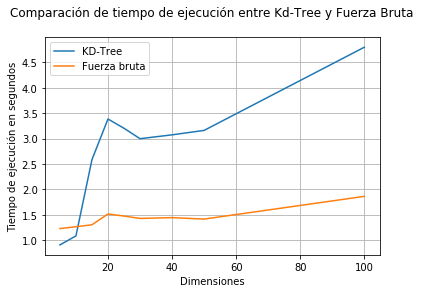

In [10]:
plt.title("Comparación de tiempo de ejecución entre Kd-Tree y Fuerza Bruta\n") 
plt.grid()
plt.xlabel("Dimensiones")
plt.ylabel("Tiempo de ejecución en segundos") 
plt.plot(dimensions, timeKDT, label = 'KD-Tree')
plt.plot(dimensions, timeBF, label = 'Fuerza bruta')
plt.legend()
plt.show()